# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

# EDA:

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier

Text(0.5, 1.0, 'amount of sales through channel')

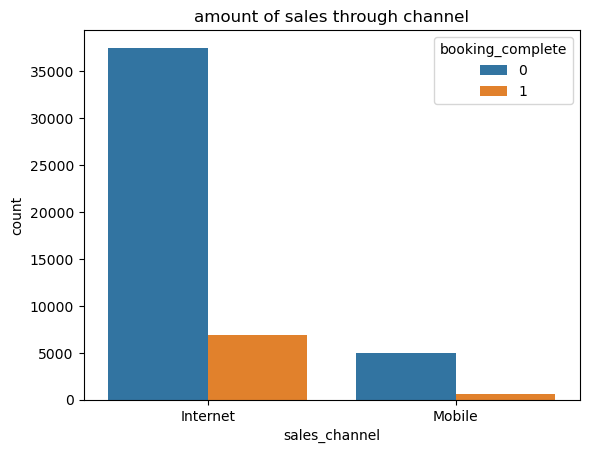

In [9]:
sns.countplot(df, x=df["sales_channel"], hue='booking_complete')
plt.title("amount of sales through channel")

The maajority of buys is through the Internet

<AxesSubplot: xlabel='flight_day', ylabel='count'>

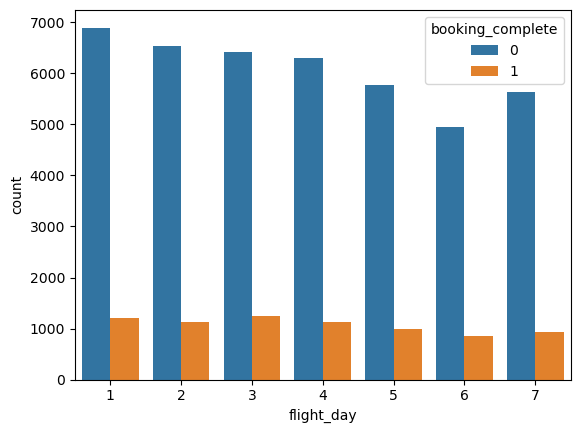

In [10]:
sns.countplot(data=df, x="flight_day", hue="booking_complete")

Most completed bookings are in the middle of the week, wheares uncompleted bookings are at the beginning of the week

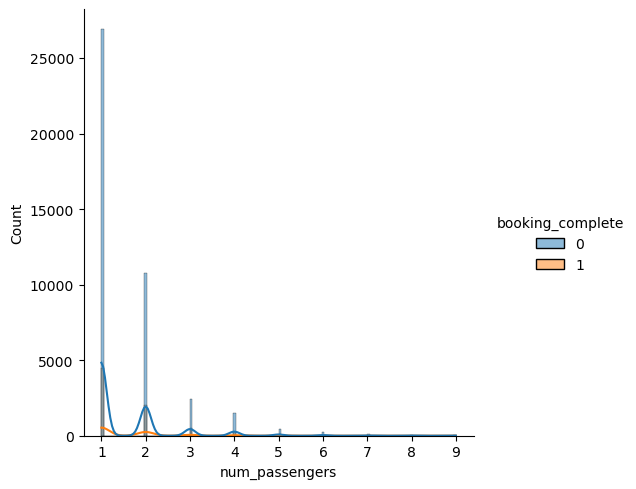

In [11]:
sns.displot(df, x=df["num_passengers"], hue=df["booking_complete"], kde=True)

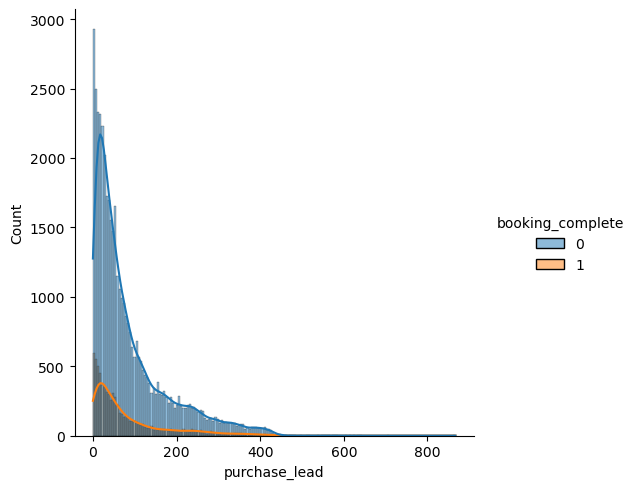

In [12]:
sns.displot(df, x=df["purchase_lead"], hue=df["booking_complete"], kde=True)

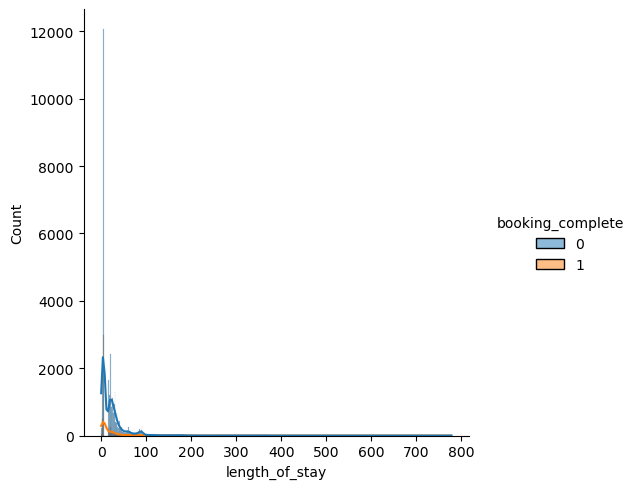

In [13]:
sns.displot(df, x="length_of_stay", hue="booking_complete", kde=True)

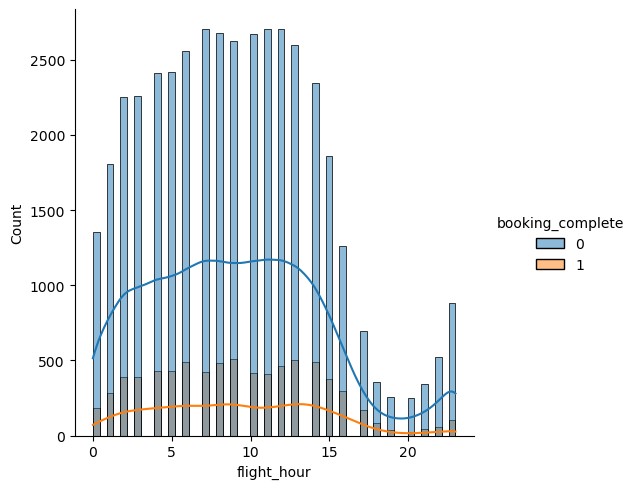

In [14]:
sns.displot(df, x=df["flight_hour"], hue=df["booking_complete"], kde=True)

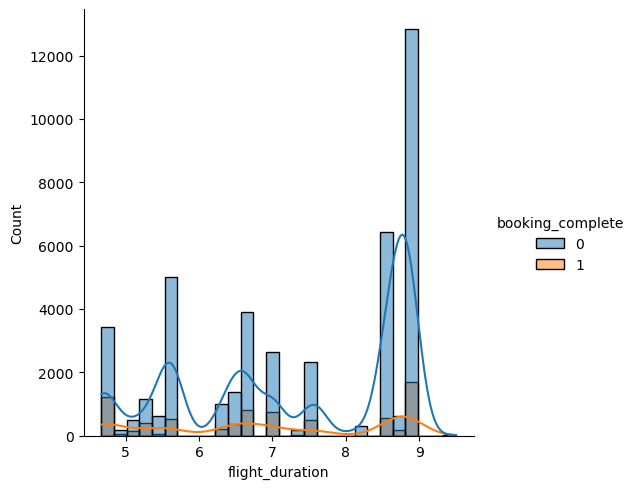

In [15]:
sns.displot(df, x=df["flight_duration"], hue=df["booking_complete"], kde=True)

Some box plots:

<AxesSubplot: xlabel='booking_complete', ylabel='purchase_lead'>

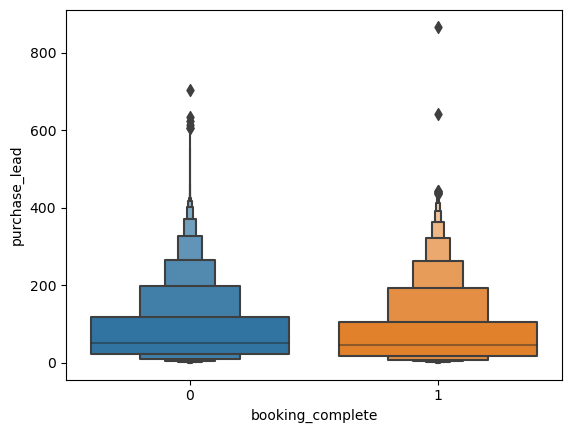

In [16]:
sns.boxenplot(df, y="purchase_lead", x="booking_complete")

<AxesSubplot: xlabel='booking_complete', ylabel='length_of_stay'>

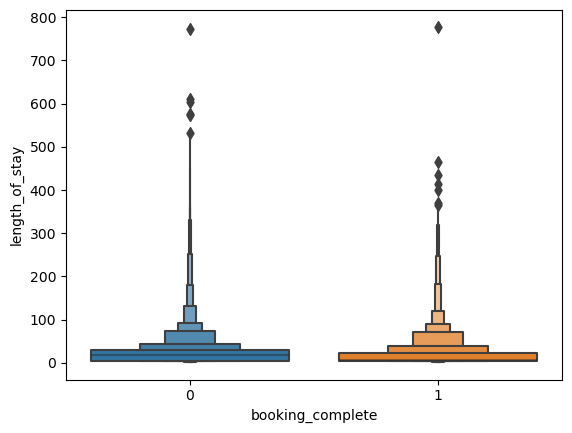

In [17]:
sns.boxenplot(df, y="length_of_stay", x="booking_complete")

We se alot of outliers in both 'purchase_lead' and length_of_stay'. We will delete them later

<AxesSubplot: xlabel='booking_complete', ylabel='flight_hour'>

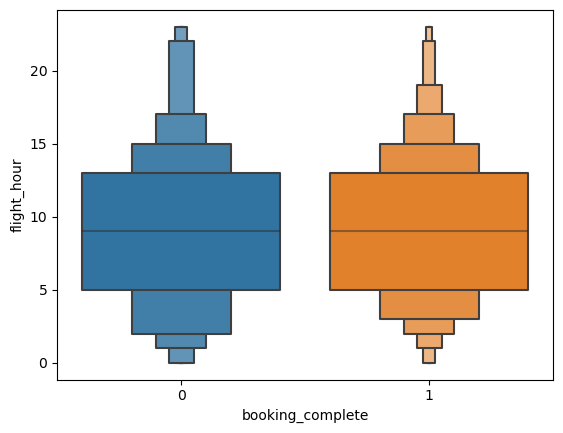

In [18]:
sns.boxenplot(df, y="flight_hour", x="booking_complete")

<AxesSubplot: xlabel='booking_complete', ylabel='flight_duration'>

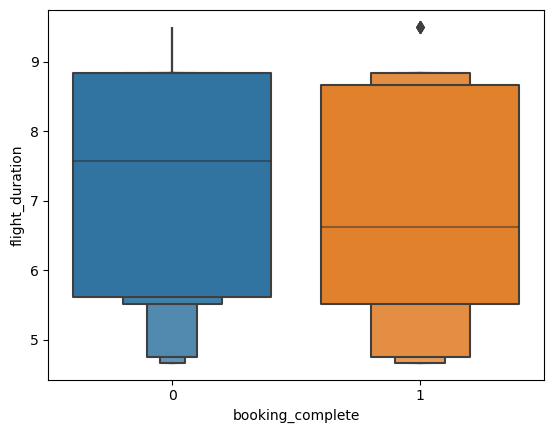

In [19]:
sns.boxenplot(df, y="flight_duration", x="booking_complete")

Bar plots for categorical variables:

<AxesSubplot: xlabel='trip_type', ylabel='count'>

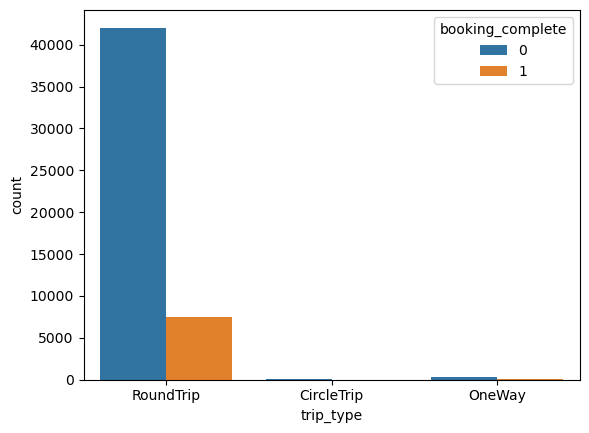

In [20]:
sns.countplot(df, x="trip_type", hue='booking_complete')

<AxesSubplot: xlabel='wants_extra_baggage', ylabel='count'>

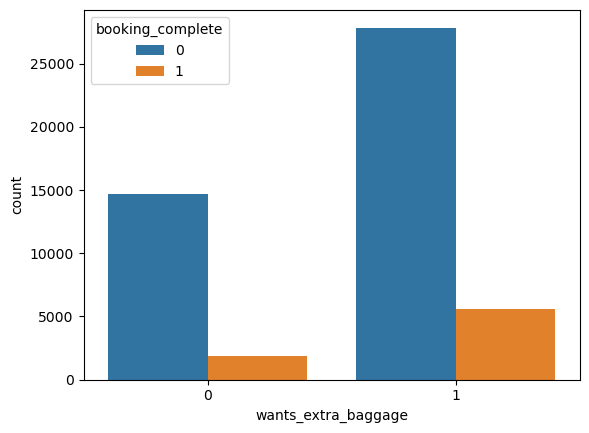

In [21]:
sns.countplot(df, x="wants_extra_baggage", hue='booking_complete')

<AxesSubplot: xlabel='wants_preferred_seat', ylabel='count'>

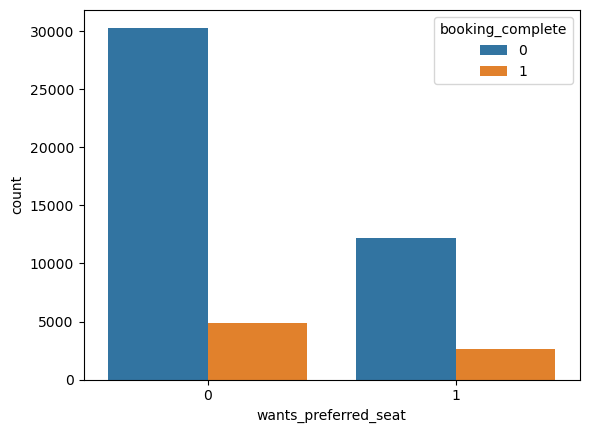

In [22]:
sns.countplot(df, x="wants_preferred_seat", hue='booking_complete')

<AxesSubplot: xlabel='wants_in_flight_meals', ylabel='count'>

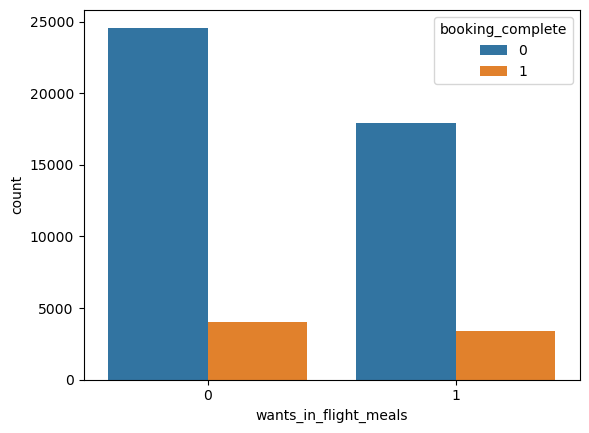

In [23]:
sns.countplot(df, x="wants_in_flight_meals", hue='booking_complete')

correlation heatmap:

<AxesSubplot: >

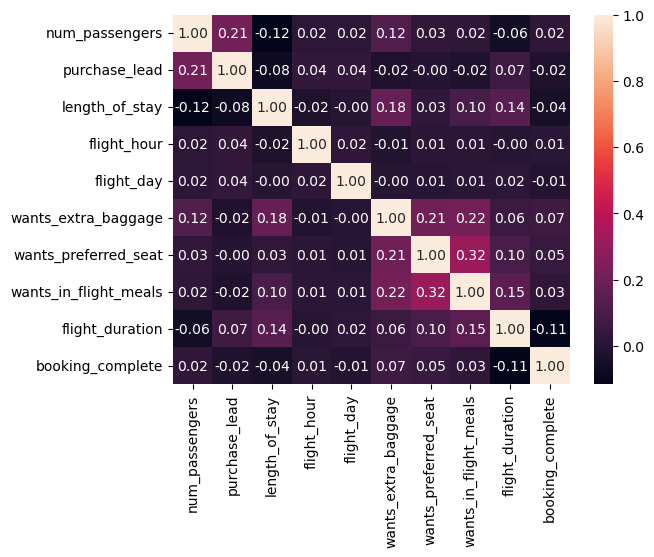

In [24]:
# calculate the correlation matrix on the numeric columns
corr = df.select_dtypes('number').corr()

# plot the heatmap
sns.heatmap(corr, annot=True, fmt=".2f")

Rout analysis:  
we want to understand how different flight routes impact booking completion. We'll calculate the booking completion rate for each unique route and then visualize the results.

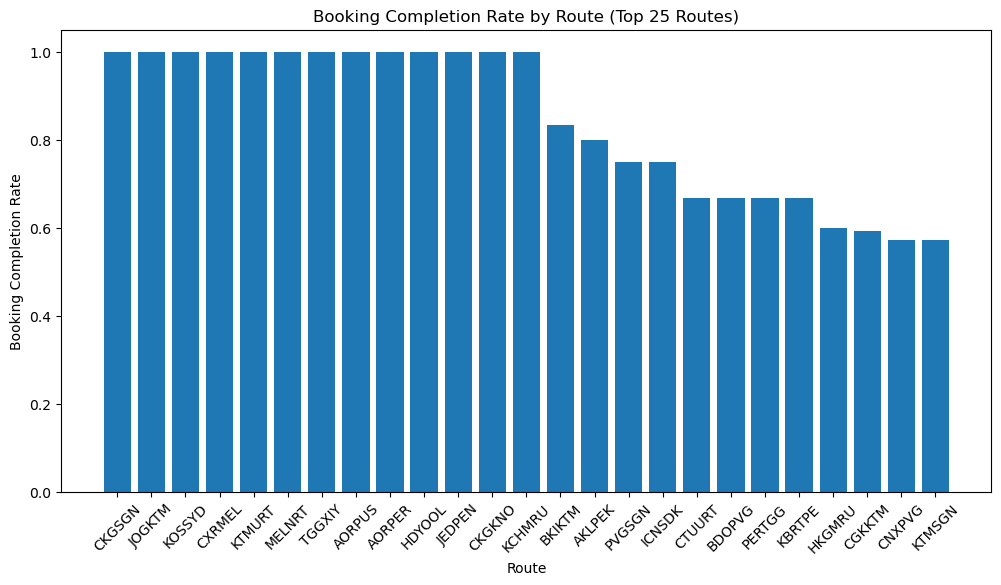

In [25]:
route_completion = df.groupby('route')['booking_complete'].mean().reset_index()

# Sort routes by booking completion rate (descending order)
route_completion = route_completion.sort_values(by='booking_complete', ascending=False)

# Plot the top 25 routes with the highest booking completion rates
plt.figure(figsize=(12, 6))
plt.bar(route_completion['route'][:25], route_completion['booking_complete'][:25])
plt.xlabel('Route')
plt.ylabel('Booking Completion Rate')
plt.title('Booking Completion Rate by Route (Top 25 Routes)')
plt.xticks(rotation=45)
plt.show()

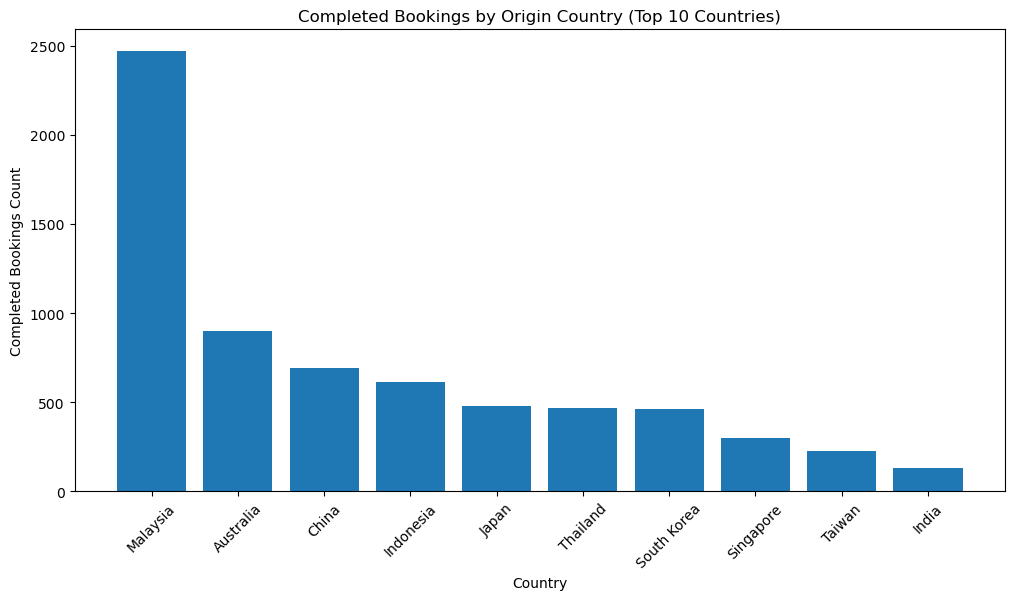

In [26]:
# Group data by booking origin (country) and calculate the count of completed bookings
booking_origin_counts = df[df['booking_complete'] == 1].groupby('booking_origin').size().reset_index()
booking_origin_counts.columns = ['booking_origin', 'completed_bookings']

# Sort countries by completed bookings (descending order)
booking_origin_counts = booking_origin_counts.sort_values(by='completed_bookings', ascending=False)

# Plot a bar chart to visualize completed bookings by country
plt.figure(figsize=(12, 6))
plt.bar(booking_origin_counts['booking_origin'][:10], booking_origin_counts['completed_bookings'][:10])
plt.xlabel('Country')
plt.ylabel('Completed Bookings Count')
plt.title('Completed Bookings by Origin Country (Top 10 Countries)')
plt.xticks(rotation=45)
plt.show()

Feature importance using Random Forests:

In [27]:
X = df.drop(columns=['booking_complete'])
y = df['booking_complete']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0) # 0.25 x 0.8 = 0.2

In [28]:
print(f"X_train shape = {X_train.shape}")
print(f"y_train shape = {y_train.shape}")
print(f"X_test shape = {X_test.shape}")
print(f"y_test shape = {X_test.shape}")
# print(f"X_val shape = {X_val.shape}")
# print(f"X_val shape = {X_val.shape}")

X_train shape = (40000, 13)
y_train shape = (40000,)
X_test shape = (10000, 13)
y_test shape = (10000, 13)


Explore catorical features:

In [29]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['sales_channel', 'trip_type', 'route', 'booking_origin']

Explore numerical features:

In [30]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['num_passengers',
 'purchase_lead',
 'length_of_stay',
 'flight_hour',
 'flight_day',
 'wants_extra_baggage',
 'wants_preferred_seat',
 'wants_in_flight_meals',
 'flight_duration']

Encode categorical variables:

In [31]:
# preview categorical variables in X_train

X_train[categorical].head()

,sales_channel,trip_type,route,booking_origin
20330,Mobile,RoundTrip,MELSGN,Australia
17532,Internet,RoundTrip,KTMMFM,Macau
45819,Mobile,RoundTrip,DPSPVG,China
34807,Internet,RoundTrip,REPTPE,Taiwan
31888,Internet,RoundTrip,HKTKIX,Japan


In [32]:

# encode categorical variables with one-hot encoding

encoder = ce.OrdinalEncoder(cols=categorical)

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)


In [33]:
X_train.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
20330,1,1,1,18,21,14,2,1,1,1,0,0,8.83
17532,1,2,1,23,41,5,1,2,2,1,0,1,4.75
45819,2,1,1,46,6,17,6,3,3,1,1,1,5.33
34807,1,2,1,40,4,12,5,4,4,0,1,0,4.67
31888,1,2,1,56,4,3,5,5,5,1,1,1,7.00


In [34]:
X_test.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
11841,2,2,1,33,20,9,2,16.0,1.0,1,1,1,8.83
19602,1,2,1,115,137,12,5,295.0,11.0,1,0,0,8.83
45519,1,2,1,14,6,4,4,70.0,3.0,0,0,0,6.42
25747,1,2,1,1,2,15,1,161.0,11.0,1,1,0,4.75
42642,1,2,1,47,6,1,6,42.0,6.0,0,0,1,7.57


In [36]:
X_train.shape

(40000, 13)

Random forest Classifier:

In [37]:
# instantiate the classifier 
rfc = RandomForestClassifier(random_state=0, class_weight='balanced')

# fit the model
rfc.fit(X_train, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test)

# Check accuracy score 
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('Model F-1 score: {0:0.4f}'. format(f1_score(y_test, y_pred)))

Model accuracy score: 0.8532
Model F-1 score: 0.1734


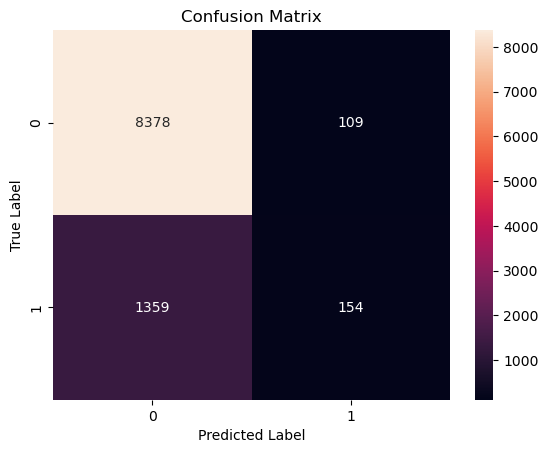

In [39]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8487
           1       0.59      0.10      0.17      1513

    accuracy                           0.85     10000
   macro avg       0.72      0.54      0.55     10000
weighted avg       0.82      0.85      0.81     10000



This is not a good resault! Let's try to improve it. First we have to use an oversampling tecnique to overcome the unbalance problem

In [53]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

# Perform resampling on the training set only
oversampler = SMOTEENN()
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)


In [44]:
# instantiate the classifier 
rfc_oversampled = RandomForestClassifier(random_state=0)

# fit the model
rfc_oversampled.fit(X_resampled, y_resampled)

# Predict the Test set results
y_pred = rfc_oversampled.predict(X_test)

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('Model F-1 score: {0:0.4f}'. format(f1_score(y_test, y_pred)))

Model accuracy score: 0.7029
Model F-1 score: 0.3918


In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.72      0.80      8487
           1       0.28      0.63      0.39      1513

    accuracy                           0.70     10000
   macro avg       0.60      0.67      0.60     10000
weighted avg       0.82      0.70      0.74     10000



This resault is somwhat better, let's try to improve it more by scaling and normalising the dataset

In [46]:
columns = X_train.columns

In [56]:
scaler = RobustScaler()
sX_train = scaler.fit_transform(X_resampled)
sX_test = scaler.transform(X_test)


sX_train = pd.DataFrame(sX_train, columns=columns)
sX_test = pd.DataFrame(sX_test, columns=columns)

In [57]:
# instantiate the classifier 
rfc_scaled = RandomForestClassifier(random_state=0)

# fit the model
rfc_scaled.fit(sX_train, y_resampled)

# Predict the Test set results
y_pred = rfc_scaled.predict(sX_test)

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('Model F-1 score: {0:0.4f}'. format(f1_score(y_test, y_pred)))

Model accuracy score: 0.7036
Model F-1 score: 0.3884


Scaling did not improve the resalts. Let's go on only with resampling. we will use the rfc_oversampled model to calculate feature importance

In [59]:
# view the feature scores

feature_scores = pd.Series(rfc_oversampled.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

booking_origin           0.246692
flight_duration          0.163054
route                    0.136434
purchase_lead            0.118559
length_of_stay           0.105920
flight_hour              0.082361
flight_day               0.063977
num_passengers           0.024569
wants_in_flight_meals    0.017300
wants_extra_baggage      0.014732
wants_preferred_seat     0.013471
sales_channel            0.010676
trip_type                0.002254
dtype: float64

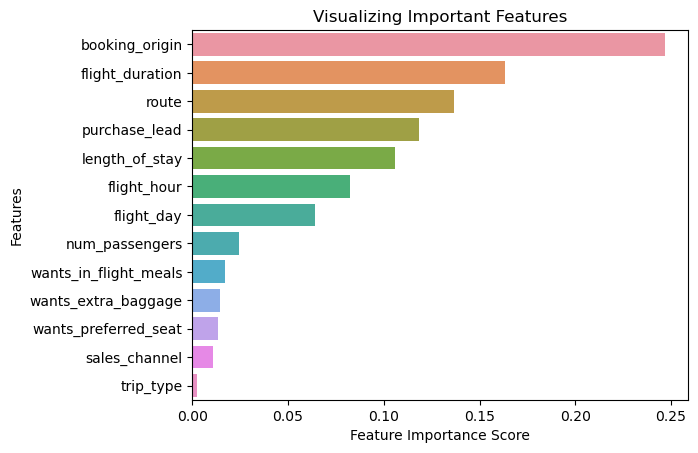

In [60]:
# Creating a seaborn bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)

# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# Add title to the graph
plt.title("Visualizing Important Features")

# Visualize the graph
plt.show()

We delete Theoutliers of these 2 vars (purchase_lead, and length_of_stay) and also drop (sales_channel, and trip_type)

In [61]:
df = df[df["purchase_lead"] <= 400]
df = df[df["length_of_stay"] <= 150]

df.shape

(48991, 14)

In [62]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [123]:
drop_columns = feature_scores[feature_scores < 0.013]

In [124]:
drop_columns = drop_columns.index.tolist()
drop_columns.append('booking_complete')

In [125]:
drop_columns

['sales_channel', 'trip_type', 'booking_complete']

In [126]:
# declare feature vector and target variable
X = df.drop(drop_columns, axis=1)

y = df['booking_complete']


In [127]:
categorical = [col for col in X.columns if X[col].dtypes == 'O']
categorical

['route', 'booking_origin']

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0) # 0.25 x 0.8 = 0.2

# encode categorical variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=categorical)
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)
X_val = encoder.transform(X_val)

In [129]:
scaler = RobustScaler()
sX_train = scaler.fit_transform(X_train)
sX_test = scaler.transform(X_test)
sx_val = scaler.transform(X_val)

oversampler = SMOTEENN()
X_resampled, y_resampled = oversampler.fit_resample(sX_train, y_train)


In [130]:
# instantiate the classifier with n_estimators = 400
classifier = RandomForestClassifier(n_estimators = 400, random_state=0)

# fit the model to the training set
classifier.fit(X_resampled, y_resampled)

# Predict on the test set results
y_pred = classifier.predict(sX_test)

In [132]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('Model F-1 score: {0:0.4f}'. format(f1_score(y_test, y_pred)))

Model accuracy score: 0.7804
Model F-1 score: 0.3935


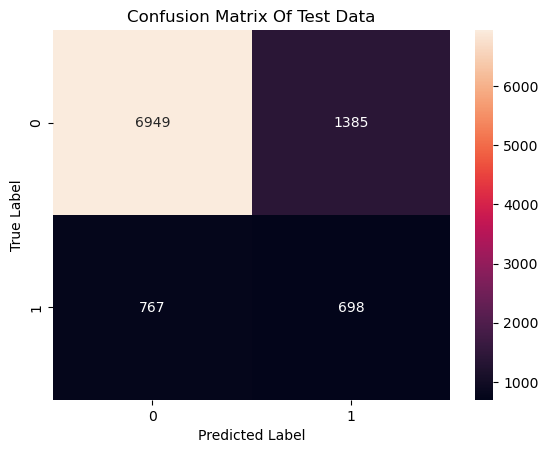

In [133]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix Of Test Data')
plt.show()

In [134]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.83      0.87      8334
           1       0.34      0.48      0.39      1465

    accuracy                           0.78      9799
   macro avg       0.62      0.66      0.63      9799
weighted avg       0.82      0.78      0.80      9799



In [135]:
y_val_pred = classifier.predict(sx_val)

print('Validation accuracy score: {0:0.4f}'. format(accuracy_score(y_val, y_val_pred)))
print('validation F-1 score: {0:0.4f}'. format(f1_score(y_val, y_val_pred)))

Validation accuracy score: 0.7860
validation F-1 score: 0.4010


In [136]:
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      8338
           1       0.34      0.48      0.40      1460

    accuracy                           0.79      9798
   macro avg       0.62      0.66      0.64      9798
weighted avg       0.82      0.79      0.80      9798



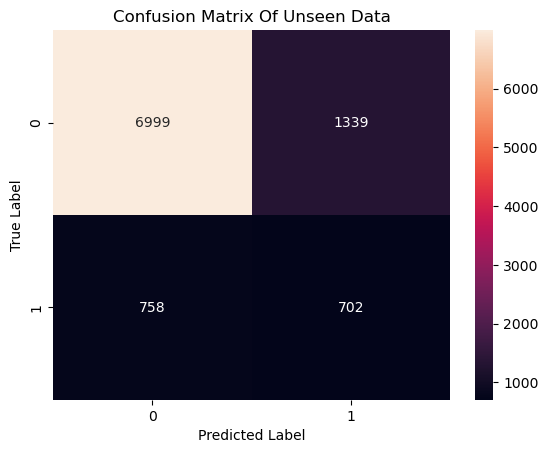

In [137]:
cm = confusion_matrix(y_val,y_val_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix Of Unseen Data')
plt.show()

In [138]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score


# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400],  # Number of trees in the forest
    'max_depth': [10, 20, 30, None],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
    'max_features': ['auto', 'sqrt', 'log2', None],  # Number of features to consider at each split
}

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=14)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, 
                           scoring='f1', cv=5, n_jobs=-1, verbose=1)

# Fit the grid search to the data
grid_search.fit(X_resampled, y_resampled)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


c:\Users\MHM\anaconda3\envs\BA-reviews-analysis\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
720 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\MHM\anaconda3\envs\BA-reviews-analysis\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\MHM\anaconda3\envs\BA-reviews-analysis\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\MHM\anaconda3\envs\BA-reviews-analysis\lib\site-packages\sklearn\base.py", line 637, in _validate

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=14), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='f1', verbose=1)

In [139]:
# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best model
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf_model.predict(sX_test)

# Evaluate the model using the F1-score
f1 = f1_score(y_test, y_pred)

# Print the best hyperparameters and F1-score
print("Best Hyperparameters:", best_params)
print("F1-Score:", f1)

Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
F1-Score: 0.40068007934259


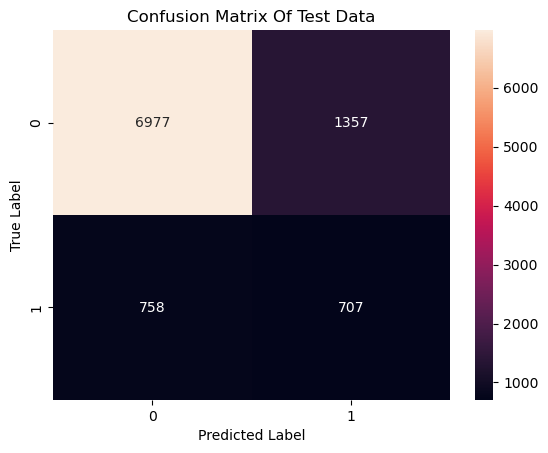

In [140]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix Of Test Data')
plt.show()

In [142]:
y_val_pred = best_rf_model.predict(sx_val)

print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      8338
           1       0.34      0.48      0.40      1460

    accuracy                           0.78      9798
   macro avg       0.62      0.66      0.63      9798
weighted avg       0.82      0.78      0.80      9798



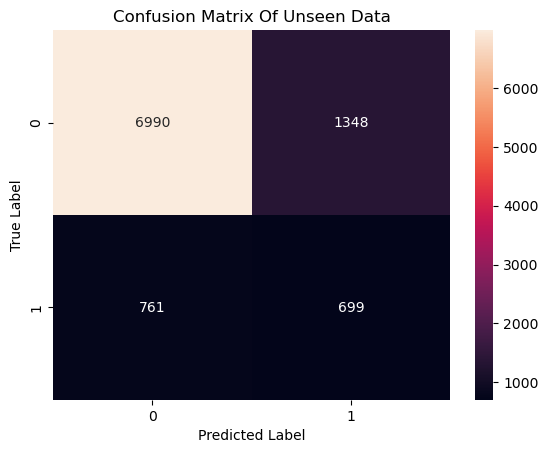

In [143]:
cm = confusion_matrix(y_val, y_val_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix Of Unseen Data')
plt.show()